# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# Importing the Dataset

In [52]:
df = pd.read_csv("Fifa.csv")
df.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,...,16,14,11,47,11,91,89,95,90,89


# Deleting Unwanted Columns

In [4]:
del df['National_Kit']

df.head()

,Name,Nationality,National_Position,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,...,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185 cm,...,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170 cm,...,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174 cm,...,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182 cm,...,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193 cm,...,16,14,11,47,11,91,89,95,90,89


# Exploring the Dataset

<AxesSubplot:xlabel='count', ylabel='Nationality'>

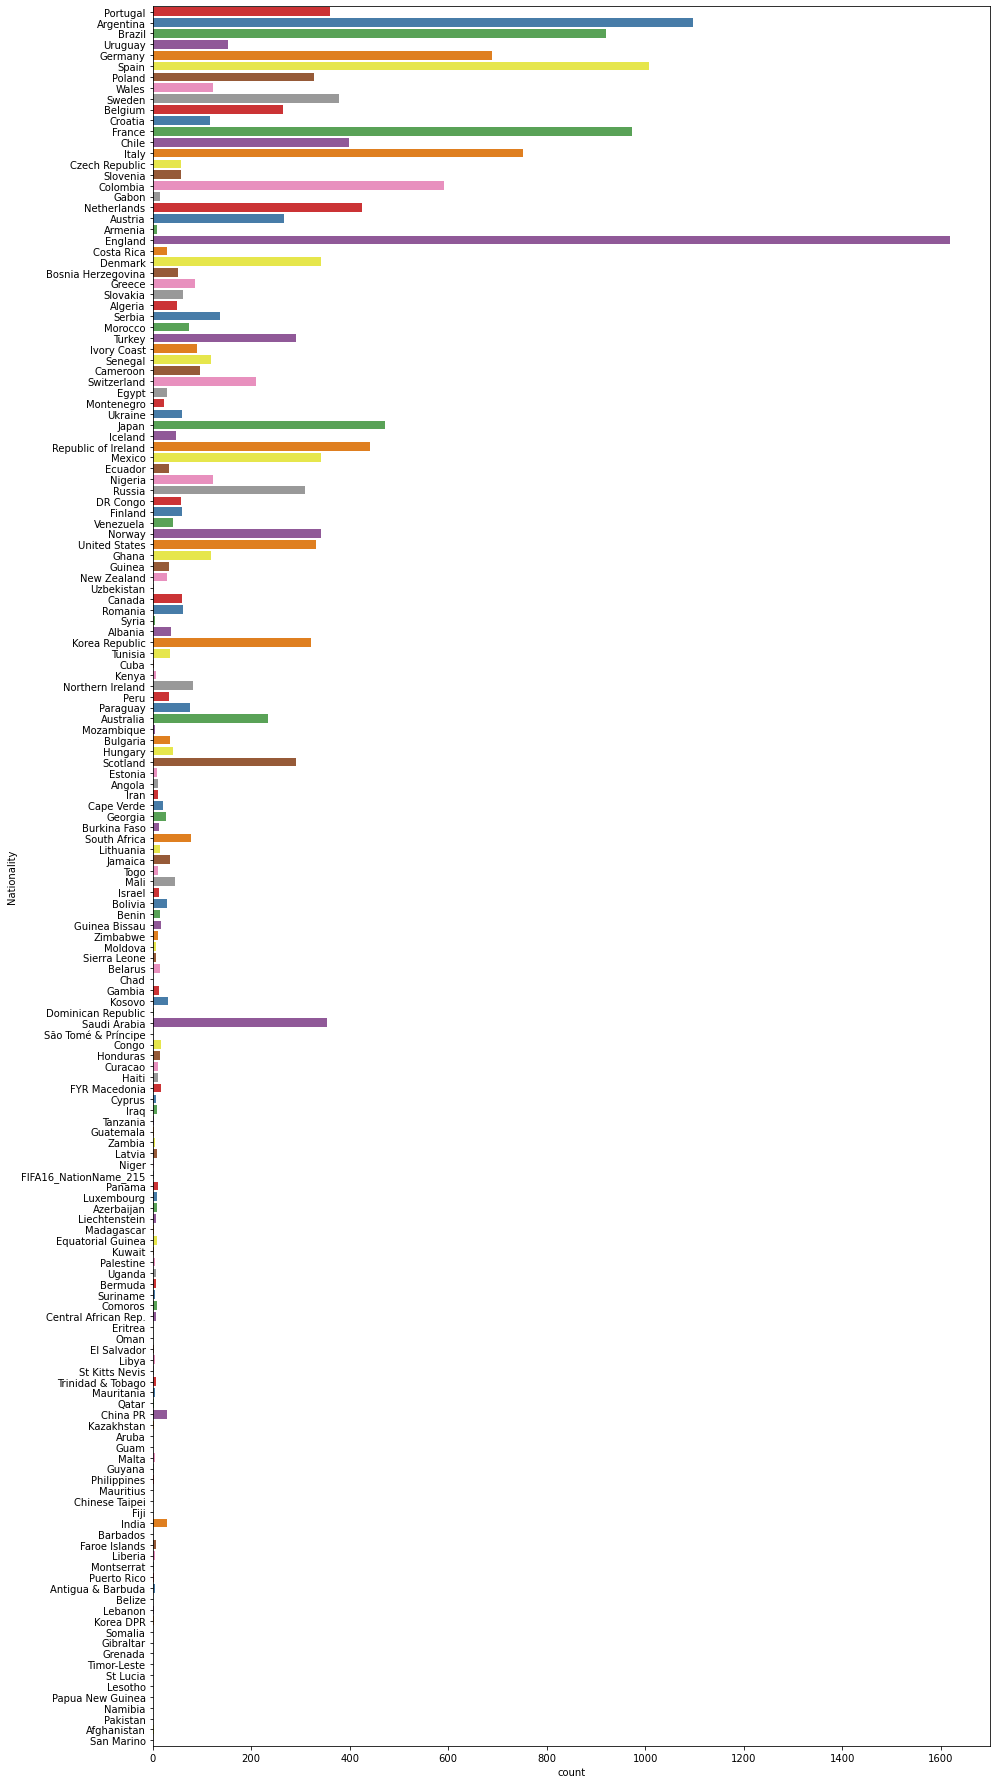

In [5]:
plt.figure(figsize = (15,32))

sb.countplot(y = df.Nationality, palette = "Set1")

<AxesSubplot:xlabel='Age', ylabel='count'>

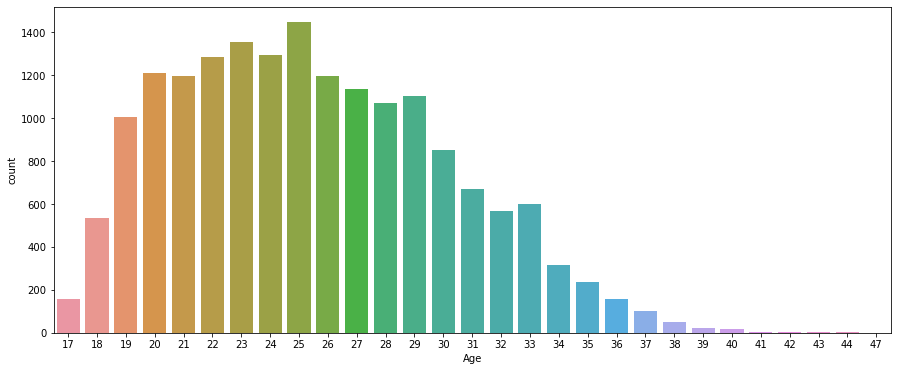

In [6]:
plt.figure(figsize = (15,6))

sb.countplot(x = "Age", data = df)

# Assigning Weights

In [7]:
#Weights
a,b,c,d = 0.5,1,2,3

# Goalkeeper Score Normalization & Comparison

In [8]:
#Goalkeeper Prediction

#The Major KPIs for a Goalkeeper are: How good a Shot Stopper is he? How good a Sweeper Keeper is he?

df['gk_shot_stopper'] = (b*df.Reactions + b*df.Composure + a*df.Speed + a*df.Strength + c*df.Jumping + b*df.GK_Positioning + c*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling)/(2*a + 4*b + 2*c + 1*d)
df['gk_sweeper'] = (b*df.Reactions + b*df.Composure + b*df.Speed + a*df.Short_Pass + a*df.Long_Pass + b*df.Jumping + b*df.GK_Positioning + b*df.GK_Diving + d*df.GK_Reflexes + b*df.GK_Handling + d*df.GK_Kicking + c*df.Vision)/(2*a + 4*b + 3*c + 2*d)

C:\Users\samri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Shot Stopping Score')

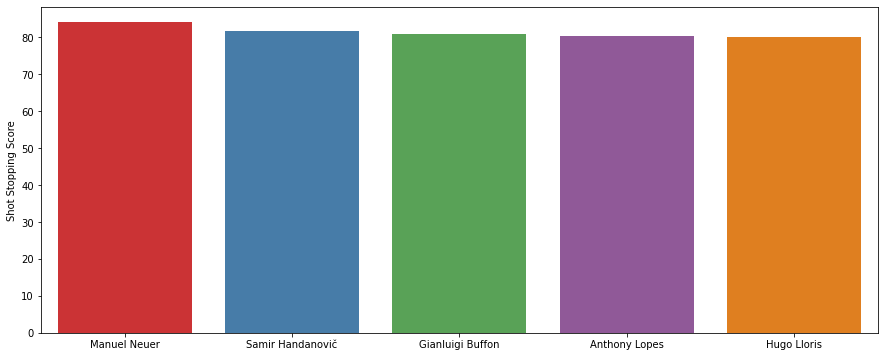

In [31]:
plt.figure(figsize = (15,6))

#Generating a Sequential Data plot

gk1 = df.sort_values('gk_shot_stopper',ascending = False)[:5]
x1 = np.array(list(gk1['Name']))
y1 = np.array(list(gk1['gk_shot_stopper']))

sb.barplot(x1,y1,palette = "Set1")
plt.ylabel("Shot Stopping Score")

C:\Users\samri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Sweeping Score')

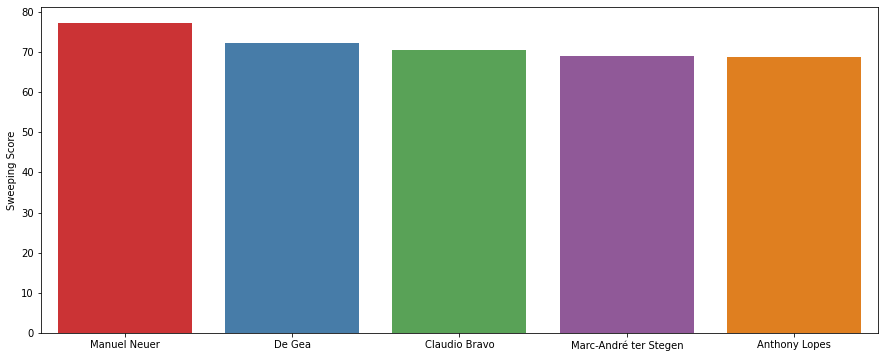

In [32]:
plt.figure(figsize = (15,6))

#Generating a Sequential Data plot

gk2 = df.sort_values('gk_sweeper',ascending = False)[:5]
x1 = np.array(list(gk2['Name']))
y1 = np.array(list(gk2['gk_sweeper']))

sb.barplot(x1,y1,palette = "Set1")
plt.ylabel("Sweeping Score")

# Defender Score Normalization & Comparison

In [11]:
#Defenders Prediction

#Defenders are widely seperated as Central Defenders and Wing Backs

df['center_backs'] = (d*df.Reactions + c*df.Interceptions + d*df.Sliding_Tackle + d*df.Standing_Tackle + b*df.Vision+ b*df.Composure + b*df.Crossing +a*df.Short_Pass + b*df.Long_Pass+ c*df.Acceleration + b*df.Speed
+ d*df.Stamina + d*df.Jumping + d*df.Heading + b*df.Long_Shots + d*df.Marking + c*df.Aggression)/(6*b + 3*c + 7*d)
df['wing_backs'] = (b*df.Ball_Control + a*df.Dribbling + a*df.Marking + d*df.Sliding_Tackle + d*df.Standing_Tackle + a*df.Attacking_Position + c*df.Vision + c*df.Crossing + b*df.Short_Pass + c*df.Long_Pass + d*df.Acceleration +d*df.Speed + c*df.Stamina + a*df.Finishing)/(4*a + 2*b + 4*c + 4*d)

C:\Users\samri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Left Center Back Scores')

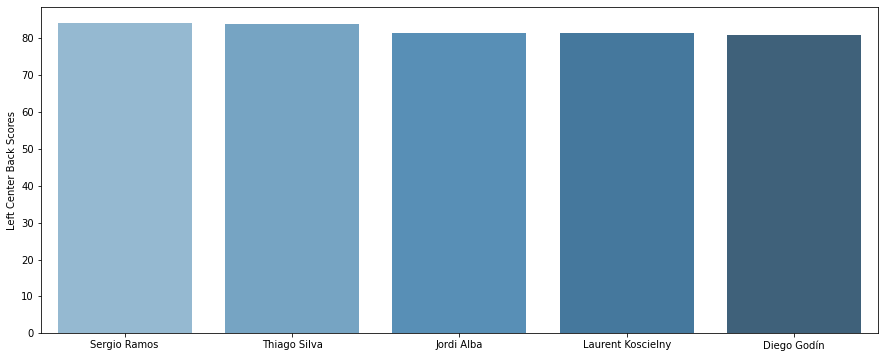

In [33]:
#Left Central Defender

plt.figure(figsize = (15,6))
lcb = df[(df['Club_Position'] == 'LCB')].sort_values('center_backs', ascending = False)[:5]
x2 = np.array(list(lcb['Name']))
y2 = np.array(list(lcb['center_backs']))

sb.barplot(x2,y2,palette = sb.color_palette("Blues_d"))
plt.ylabel("Left Center Back Scores")

C:\Users\samri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Right Center Back Scores')

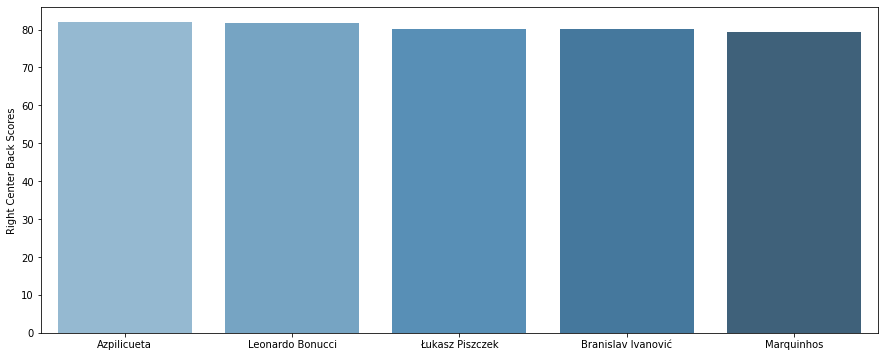

In [34]:
#Right Central Defender

plt.figure(figsize = (15,6))
rcb = df[(df['Club_Position'] == 'RCB')].sort_values('center_backs', ascending = False)[:5]
x2 = np.array(list(rcb['Name']))
y2 = np.array(list(rcb['center_backs']))

sb.barplot(x2,y2,palette = sb.color_palette("Blues_d"))
plt.ylabel("Right Center Back Scores")

C:\Users\samri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Left Wing Back Scores')

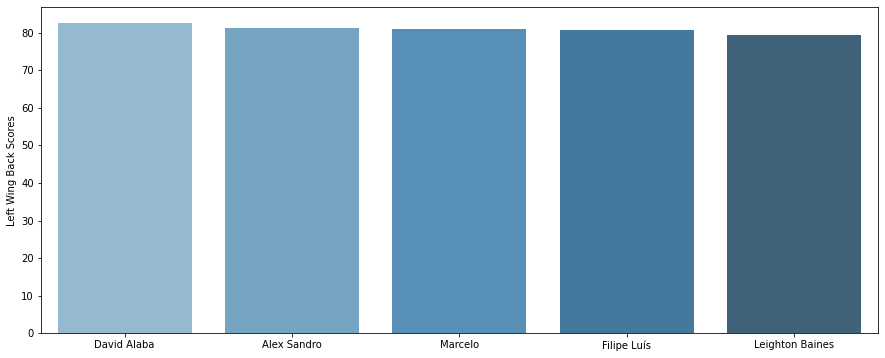

In [35]:
#Left Wing Back

plt.figure(figsize = (15,6))
lwb = df[(df['Club_Position'] == 'LWB')|(df['Club_Position'] == 'LB')].sort_values('wing_backs', ascending = False)[:5]
x2 = np.array(list(lwb['Name']))
y2 = np.array(list(lwb['wing_backs']))

sb.barplot(x2,y2,palette = sb.color_palette("Blues_d"))
plt.ylabel("Left Wing Back Scores")

C:\Users\samri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Right Wing Back Scores')

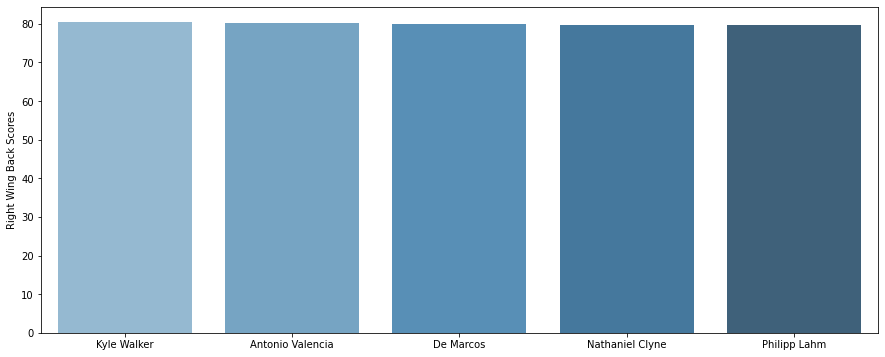

In [36]:
#Right Wing Back

plt.figure(figsize = (15,6))
rwb = df[(df['Club_Position'] == 'RWB')|(df['Club_Position'] == 'RB')].sort_values('wing_backs', ascending = False)[:5]
x2 = np.array(list(rwb['Name']))
y2 = np.array(list(rwb['wing_backs']))

sb.barplot(x2,y2,palette = sb.color_palette("Blues_d"))
plt.ylabel("Right Wing Back Scores")

# Midfielder Score Normalization & Comparison

In [17]:
#Midfielders Prediction

#Midfielders are categorized into 3 majors - The Playmaker, The Beast, The Controller
df['mid_playmaker'] = (d*df.Ball_Control + d*df.Dribbling + a*df.Marking + d*df.Reactions + d*df.Vision + c*df.Attacking_Position + c*df.Crossing + d*df.Short_Pass + c*df.Long_Pass + c*df.Curve + b*df.Long_Shots + c*df.Freekick_Accuracy)/(1*a + 1*b + 4*c + 4*d)
df['mid_beast'] = (d*df.Agility + c*df.Balance + b*df.Jumping + c*df.Strength + d*df.Stamina + a*df.Speed + c*df.Acceleration + d*df.Short_Pass + c*df.Aggression + d*df.Reactions + b*df.Marking + b*df.Standing_Tackle + b*df.Sliding_Tackle + b*df.Interceptions)/(1*a + 5*b + 4*c + 4*d)
df['mid_controller'] = (b*df.Weak_foot + d*df.Ball_Control + a*df.Dribbling + a*df.Marking + a*df.Reactions + c*df.Vision + c*df.Composure + d*df.Short_Pass + d*df.Long_Pass)/(2*c + 3*d + 4*a)

C:\Users\samri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Playmaker Score')

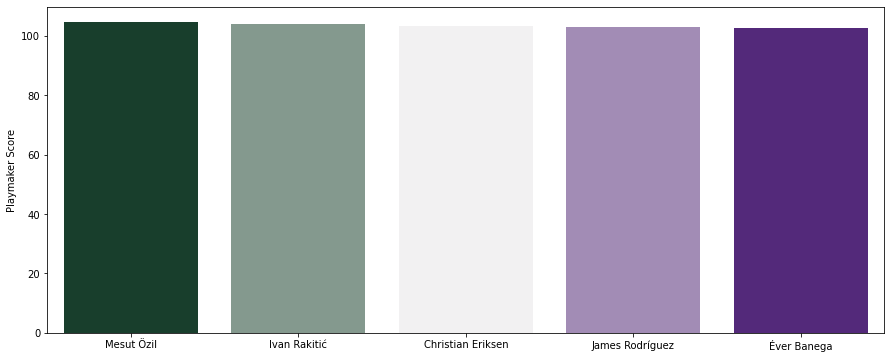

In [37]:
#The Playmaker
plt.figure(figsize = (15,6))

m1 = df[(df['Club_Position'] == 'LAM') | (df['Club_Position'] == 'CAM') | (df['Club_Position'] == 'RAM')].sort_values('mid_playmaker', ascending = False)[:5]
x3 = np.array(list(m1['Name']))
y3 = np.array(list(m1['mid_playmaker']))

sb.barplot(x3,y3,palette = sb.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel('Playmaker Score')

C:\Users\samri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Beast Score')

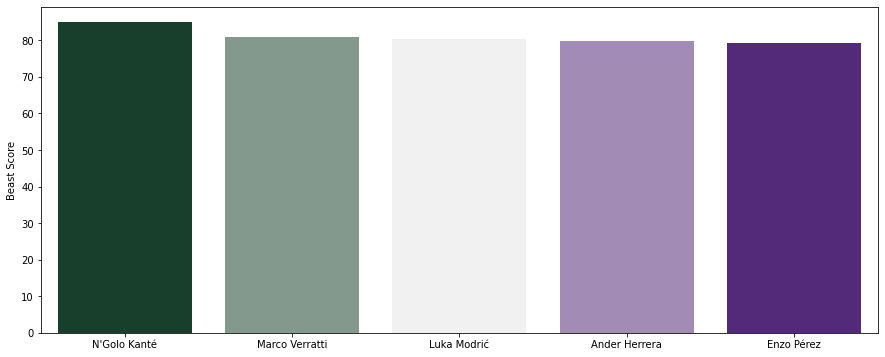

In [38]:
#The Beast
plt.figure(figsize = (15,6))

m2 = df[(df['Club_Position'] == 'RM') | (df['Club_Position'] == 'RCM')].sort_values('mid_beast', ascending = False)[:5]
x3 = np.array(list(m2['Name']))
y3 = np.array(list(m2['mid_beast']))
    
sb.barplot(x3,y3,palette = sb.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel('Beast Score')

C:\Users\samri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Controller Score')

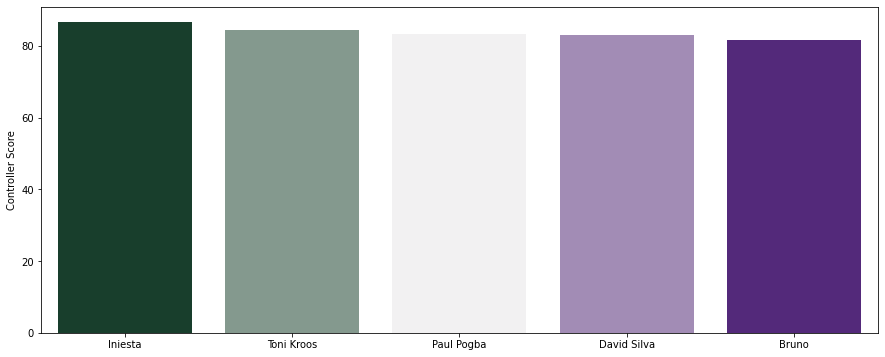

In [39]:
#The Controller
plt.figure(figsize = (15,6))

m3 = df[(df['Club_Position'] == 'LM') | (df['Club_Position'] == 'LCM')].sort_values('mid_controller', ascending = False)[:5]
x3 = np.array(list(m3['Name']))
y3 = np.array(list(m3['mid_controller']))
    
sb.barplot(x3,y3,palette = sb.diverging_palette(145, 280, s=85, l=25, n=5))
plt.ylabel('Controller Score')

# Attacker Score Normalization & Comparison

In [22]:
#Attacker Predictions

#The 3 major categories of attackers are Left Winger, Right Winger, Striker
df['att_lw'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['att_rw'] = (c*df.Weak_foot + c*df.Ball_Control + c*df.Dribbling + c*df.Speed + d*df.Acceleration + b*df.Vision + c*df.Crossing + b*df.Short_Pass + b*df.Long_Pass + b*df.Aggression + b*df.Agility + a*df.Curve + c*df.Long_Shots + b*df.Freekick_Accuracy + d*df.Finishing)/(a + 6*b + 6*c + 2*d)
df['att_st'] = (b*df.Weak_foot + b*df.Ball_Control + a*df.Vision + b*df.Aggression + b*df.Agility + a*df.Curve + a*df.Long_Shots + d*df.Balance + d*df.Finishing + d*df.Heading + c*df.Jumping + c*df.Dribbling)/(3*a + 4*b + 2*c + 3*d)

C:\Users\samri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Left Wing Scores')

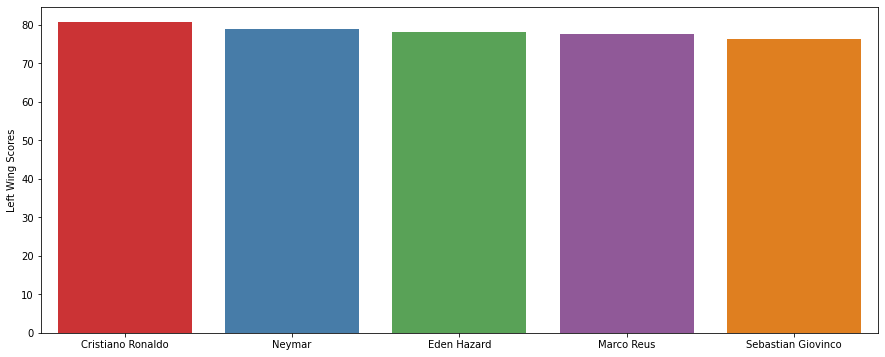

In [40]:
#Left Winger Prediction
plt.figure(figsize = (15,6))

lw = df[(df['Club_Position'] == 'LW') | (df['Club_Position'] == 'LS') | (df['Club_Position'] == 'LM')].sort_values('att_lw',ascending = False)[:5]
x4 = np.array(list(lw['Name']))
y4 = np.array(list(lw['att_lw']))

sb.barplot(x4,y4,palette = "Set1")
plt.ylabel("Left Wing Scores")

C:\Users\samri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Right Wing Scores')

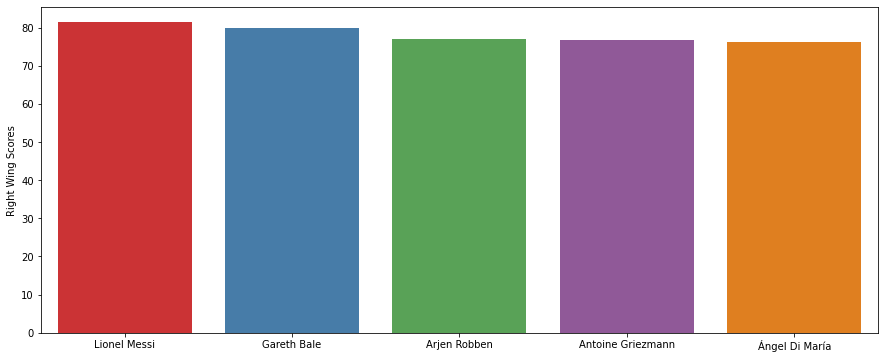

In [41]:
#Right Winger Prediction
plt.figure(figsize = (15,6))

rw = df[(df['Club_Position'] == 'RW') | (df['Club_Position'] == 'RS') | (df['Club_Position'] == 'RM')].sort_values('att_rw',ascending = False)[:5]
x4 = np.array(list(rw['Name']))
y4 = np.array(list(rw['att_rw']))

sb.barplot(x4,y4,palette = "Set1")
plt.ylabel("Right Wing Scores")

C:\Users\samri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Striker Scores')

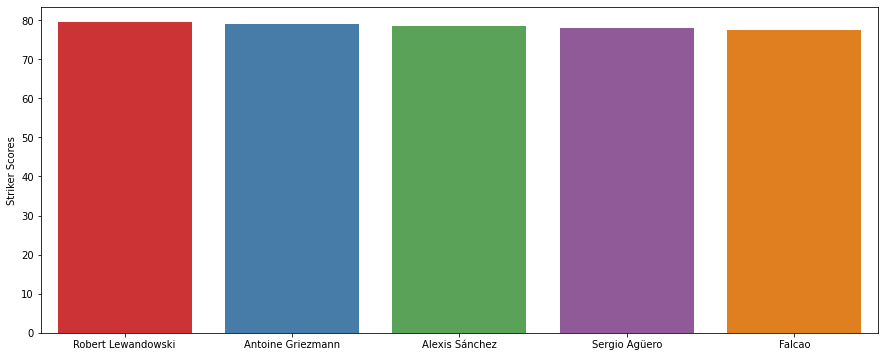

In [42]:
#Striker Prediction
plt.figure(figsize = (15,6))

st = df[(df['Club_Position'] == 'LS') | (df['Club_Position'] == 'RS') | (df['Club_Position'] == 'ST') | (df['Club_Position'] == 'CF')].sort_values('att_st',ascending = False)[:5]
x4 = np.array(list(st['Name']))
y4 = np.array(list(st['att_st']))

sb.barplot(x4,y4,palette = "Set1")
plt.ylabel("Striker Scores")

# Strongest Final XI

In [49]:
gk = list({(np.array(list(gk1['Name'])))[0],(np.array(list(gk2['Name'])))[0]})
defense = list({(np.array(list(rwb['Name'])))[0],(np.array(list(lcb['Name'])))[0],(np.array(list(rcb['Name'])))[0],(np.array(list(lwb['Name'])))[0]})
midfield = list({(np.array(list(m1['Name'])))[0],(np.array(list(m2['Name'])))[0],(np.array(list(m3['Name'])))[0]})
attack = list({(np.array(list(lw['Name'])))[0],(np.array(list(st['Name'])))[0],(np.array(list(rw['Name'])))[0]})

In [50]:
print("Goalkeeper - {}".format(gk))
print("Defenders - {}".format(defense))
print("Midfielders - {}".format(midfield))
print("Attackers - {}".format(attack))

Goalkeeper - ['Manuel Neuer']
Defenders - ['Azpilicueta', 'Sergio Ramos', 'David Alaba', 'Kyle Walker']
Midfielders - ['Iniesta', "N'Golo Kanté", 'Mesut Özil']
Attackers - ['Robert Lewandowski', 'Cristiano Ronaldo', 'Lionel Messi']
